## 고객 구매 여정 분석

### 1. 데이터 불러오기 및 전처리
---

In [ ]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# Google drive mount
from google.colab import drive
drive.mount('/content/drive')

# 경로 설정(정보 생략)
import os
os.chdir()
os.getcwd()

In [ ]:
# Data read
import pandas as pd 
df = pd.read_csv('chapter19_customer_journey.csv')
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# Data 형태 확인
print('df', df.shape) # 12,330, 18

df (12330, 18)


In [ ]:
# Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# Null 값 확인
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
# Outlier 확인
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# 월 별 사용자 이용 수
pd.DataFrame(df['Month'].value_counts())

,Month
May,3364
Nov,2998
Mar,1907
Dec,1727
Oct,549
Sep,448
Aug,433
Jul,432
June,288
Feb,184


In [ ]:
# 월 별 사용자 이용 수 정렬
pd.DataFrame(df['Month'].value_counts(), index=['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

,Month
Feb,184
Mar,1907
May,3364
June,288
Jul,432
Aug,433
Sep,448
Oct,549
Nov,2998
Dec,1727


In [ ]:
# 분석에 필요한 데이터 추출
df_cus = df[['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues']]
df_cus.head(5)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
0,0,0,1,0.20,0.20,0.0
1,0,0,2,0.00,0.10,0.0
2,0,0,1,0.20,0.20,0.0
3,0,0,2,0.05,0.14,0.0
4,0,0,10,0.02,0.05,0.0


In [ ]:
# 사용자 여정 총 3,131개
df_cus = df_cus.groupby(['Administrative', 'Informational', 'ProductRelated'], as_index=False).mean()
df_cus

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
0,0,0,0,0.196667,0.196970,0.000000
1,0,0,1,0.183362,0.191400,0.183993
2,0,0,2,0.059117,0.119900,0.219656
3,0,0,3,0.043066,0.092056,0.843937
4,0,0,4,0.035120,0.076977,0.747517
...,...,...,...,...,...,...
3126,24,5,34,0.000000,0.013801,0.000000
3127,24,6,178,0.003939,0.015263,6.149344
3128,24,6,189,0.018642,0.043831,0.870148
3129,26,9,183,0.011055,0.014200,19.567464


In [ ]:
df_cus.sort_values(by=['PageValues'], ascending = False).head(10)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
463,1,0,114,0.000000,0.000590,255.569158
1306,4,0,62,0.000000,0.001042,246.758590
2384,8,3,52,0.000000,0.005172,214.306663
3121,22,3,205,0.001747,0.008801,177.528825
2943,13,1,59,0.000000,0.004545,167.230834
263,0,2,66,0.000000,0.006154,143.211538
546,1,1,104,0.003883,0.010097,141.459054
1677,5,1,184,0.000000,0.003819,138.320834
2418,8,6,99,0.001869,0.006805,129.101374
1511,4,6,111,0.005420,0.006678,119.641474


### 2. 구매 여정 분석
---

#### 1) 페이지뷰가 가장 낮은 사용자 여정


In [ ]:
# 페이지 클릭이 가장 낮았던 사용자 여정
df_cus.sort_values(by=['PageValues'], ascending=True)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
0,0,0,0,0.196667,0.196970,0.000000
1200,3,4,1,0.000000,0.025000,0.000000
1199,3,3,290,0.012383,0.024238,0.000000
2443,9,0,20,0.019024,0.032204,0.000000
2444,9,0,21,0.026923,0.051538,0.000000
...,...,...,...,...,...,...
2943,13,1,59,0.000000,0.004545,167.230834
3121,22,3,205,0.001747,0.008801,177.528825
2384,8,3,52,0.000000,0.005172,214.306663
1306,4,0,62,0.000000,0.001042,246.758590


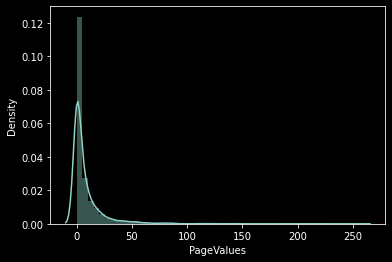

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df_cus['PageValues']);

#### 2) 이탈률이 가장 높은 사용자 여정

In [ ]:
# 이탈률이 가장 높은 사용자 여정 
df_cus.sort_values(by=['BounceRates'], ascending=False)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
133,0,1,0,0.200000,0.200000,0.000000
479,1,1,0,0.200000,0.200000,0.000000
0,0,0,0,0.196667,0.196970,0.000000
1,0,0,1,0.183362,0.191400,0.183993
135,0,1,2,0.100000,0.133333,0.000000
...,...,...,...,...,...,...
2537,9,2,9,0.000000,0.017647,0.000000
335,0,4,38,0.000000,0.026190,0.000000
2541,9,2,18,0.000000,0.007667,37.699200
2544,9,2,23,0.000000,0.022917,6.064426


In [ ]:
# 이탈률 평균(0.7%)
df_cus['BounceRates'].mean()

0.0074609932708118686

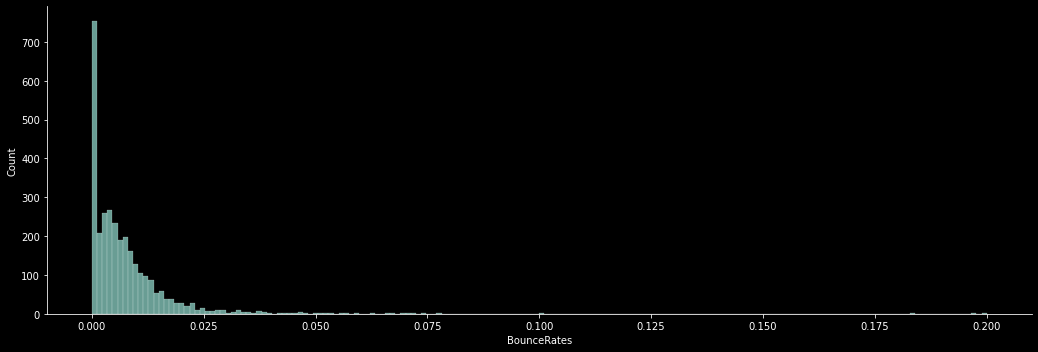

In [ ]:
# 이탈률 displotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.displot(df_cus, x="BounceRates");
plt.gcf().set_size_inches(16.5, 5)

In [ ]:
# 75% 분위수 기준으로 이탈률이 높은 사용자 여정 탐색
df_cus['BounceRates'].describe()

count    3131.000000
mean        0.007461
std         0.011096
min         0.000000
25%         0.001362
50%         0.005000
75%         0.009804
max         0.200000
Name: BounceRates, dtype: float64

In [ ]:
# 75% 분위수 기준으로 이탈률이 높은 사용자 여정 탐색
df_cus[df_cus['BounceRates']>0.009804].head(5)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
0,0,0,0,0.196667,0.196970,0.000000
1,0,0,1,0.183362,0.191400,0.183993
2,0,0,2,0.059117,0.119900,0.219656
3,0,0,3,0.043066,0.092056,0.843937
4,0,0,4,0.035120,0.076977,0.747517


In [ ]:
# 개선이 필요한 사용자 여정 수(781개)
len(df_cus[df_cus['BounceRates']>0.009804]) 

781

In [ ]:
# Administrative(관리페이지)
df_admin = pd.DataFrame(df_cus[df_cus['BounceRates']>0.009804].groupby('Administrative')['Administrative'].count().sort_values(ascending=False))
df_admin.head(10)

,Administrative
Administrative,
0,140
1,86
2,81
3,68
5,63
4,54
6,52
9,45
8,42


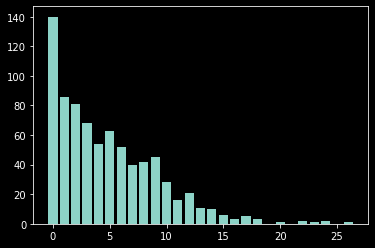

In [ ]:
# Administrative(관리페이지) plotting
plt.bar(df_admin.index, df_admin['Administrative']);

In [ ]:
# Informational(정보페이지)
df_info = pd.DataFrame(df_cus[df_cus['BounceRates']>0.009804].groupby('Informational')['Informational'].count().sort_values(ascending=False))
df_info

,Informational
Informational,
0,248
1,173
2,138
3,92
4,63
5,28
6,21
7,12
9,4


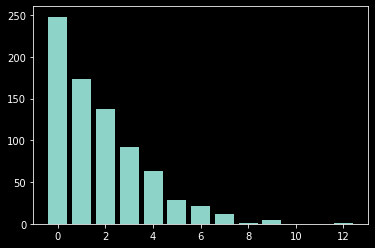

In [ ]:
# Informational(정보페이지) plotting
plt.bar(df_info.index, df_info['Informational']);

In [ ]:
# ProductRelated(제품페이지)
df_prod = pd.DataFrame(df_cus[df_cus['BounceRates']>0.009804].groupby('ProductRelated')['ProductRelated'].count().sort_values(ascending=False))
df_prod.head(5)

,ProductRelated
ProductRelated,
36,18
23,15
8,15
27,15
11,14


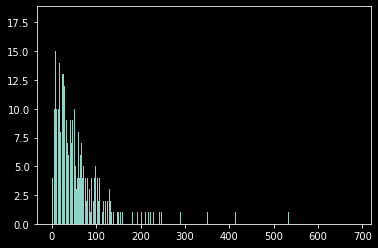

In [ ]:
# ProductRelated(제품페이지) plotting
plt.bar(df_prod.index, df_prod['ProductRelated']);

#### 3) 종료율 가장 높은 사용자 여정

In [ ]:
# 종료율이 가장 높은 사용자 여정 
df_cus.sort_values(by=['ExitRates'], ascending=False)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
479,1,1,0,0.200000,0.200000,0.000000
133,0,1,0,0.200000,0.200000,0.000000
0,0,0,0,0.196667,0.196970,0.000000
1,0,0,1,0.183362,0.191400,0.183993
135,0,1,2,0.100000,0.133333,0.000000
...,...,...,...,...,...,...
1166,3,2,58,0.000000,0.000410,0.000000
772,2,0,109,0.000000,0.000262,0.000000
1241,3,6,17,0.000000,0.000000,27.695008
497,1,1,21,0.000000,0.000000,86.123515


In [ ]:
# 종료율 평균(2%)
df_cus['ExitRates'].mean()

0.02191452121274479

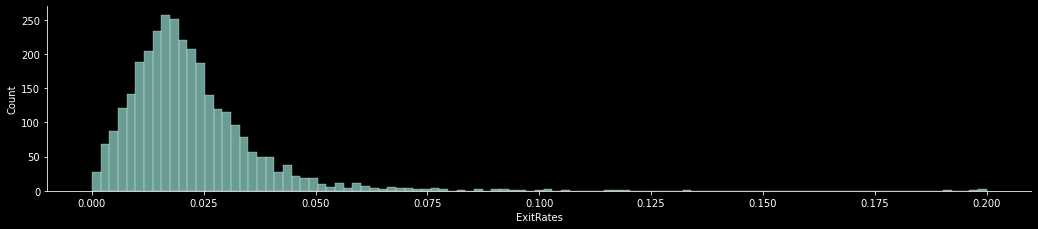

In [ ]:
sns.displot(df_cus, x="ExitRates");
plt.gcf().set_size_inches(16.5, 3)

In [ ]:
df_cus['ExitRates'].describe()

count    3131.000000
mean        0.021915
std         0.014863
min         0.000000
25%         0.013098
50%         0.019235
75%         0.027327
max         0.200000
Name: ExitRates, dtype: float64

In [ ]:
# 75% 분위수 기준으로 종료율이 높은 사용자 여정 탐색
df_cus[df_cus['ExitRates']>0.027327].head(5)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
0,0,0,0,0.196667,0.196970,0.000000
1,0,0,1,0.183362,0.191400,0.183993
2,0,0,2,0.059117,0.119900,0.219656
3,0,0,3,0.043066,0.092056,0.843937
4,0,0,4,0.035120,0.076977,0.747517


In [ ]:
 # 개선이 필요한 사용자 여정 수(783개)
len(df_cus[df_cus['ExitRates']>0.027327])

783

In [ ]:
# Administrative(관리페이지)
df_admin = pd.DataFrame(df_cus[df_cus['ExitRates']>0.027327].groupby('Administrative')['Administrative'].count().sort_values(ascending=False))
df_admin.head(5)

,Administrative
Administrative,
0,165
1,92
2,88
3,80
5,58


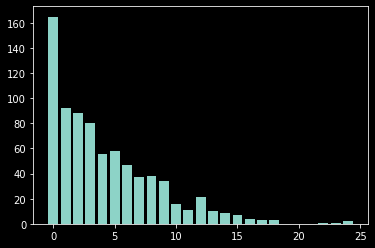

In [ ]:
# Administrative(관리페이지) plotting
plt.bar(df_admin.index, df_admin['Administrative']);

In [ ]:
# Informational(정보페이지)
df_info = pd.DataFrame(df_cus[df_cus['ExitRates']>0.027327].groupby('Informational')['Informational'].count().sort_values(ascending=False))
df_info

,Informational
Informational,
0,243
1,181
2,150
3,89
4,52
5,28
6,18
7,11
9,3


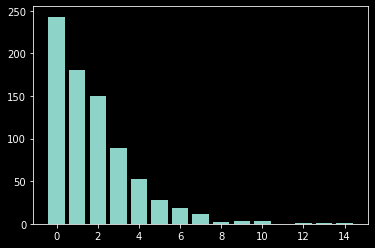

In [ ]:
# Informational(정보페이지) plotting
plt.bar(df_info.index, df_info['Informational']);

In [ ]:
# ProductRelated(제품페이지) 
df_prod = pd.DataFrame(df_cus[df_cus['ExitRates']>0.027327].groupby('ProductRelated')['ProductRelated'].count().sort_values(ascending=False))
df_prod.head(5)

,ProductRelated
ProductRelated,
8,18
11,16
27,16
17,16
2,15


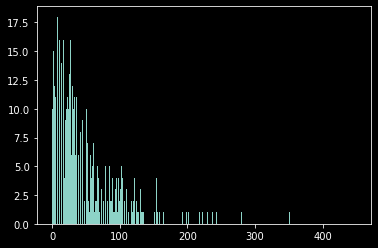

In [ ]:
# ProductRelated(제품페이지) plotting
plt.bar(df_prod.index, df_prod['ProductRelated']);

### 3. 인사이트 도출
---

#### 1) 개선이 시급한 단일 페이지
* 이탈률과 종료율이 75% 분위수를 넘어가는 cnt가 가장 많은 페이지를 우선순위로 개선함

In [ ]:
# Administrative
# 이탈률 75% 분위수 이상 cnt, Top5
df_admin_B = df_cus[df_cus['BounceRates']>0.009804].groupby('Administrative', as_index=False)['Administrative'].count()
df_admin_B = df_admin_B.reset_index()
df_admin_B.columns = ['ID', 'BounceRates_cnt']
df_admin_B.head(5)

,ID,BounceRates_cnt
0,0,140
1,1,86
2,2,81
3,3,68
4,4,54


In [ ]:
# 종료율 75% 분위수 이상 cnt, Top5
df_admin_E = df_cus[df_cus['ExitRates']>0.027327].groupby('Administrative', as_index=False)['Administrative'].count()
df_admin_E = df_admin_E.reset_index()
df_admin_E.columns = ['ID', 'ExitRates_cnt']
df_admin_E.head(5)

,ID,ExitRates_cnt
0,0,165
1,1,92
2,2,88
3,3,80
4,4,56


In [ ]:
# merge 후 total 기준 내림차순 정렬
df_admin_merge = pd.merge(df_admin_B, df_admin_E, how='left', on='ID')
df_admin_merge['total'] = df_admin_merge['BounceRates_cnt'] +  df_admin_merge['ExitRates_cnt']
df_admin_merge.sort_values(by=['total'], ascending=False).head(5)

,ID,BounceRates_cnt,ExitRates_cnt,total
0,0,140,165.0,305.0
1,1,86,92.0,178.0
2,2,81,88.0,169.0
3,3,68,80.0,148.0
5,5,63,58.0,121.0


In [ ]:
# Informational
# 이탈률 75% 분위수 이상 cnt
df_info_B = df_cus[df_cus['BounceRates']>0.009804].groupby('Informational', as_index=False)['Informational'].count()
df_info_B = df_info_B.reset_index()
df_info_B.columns = ['ID', 'BounceRates_cnt']

# 종료율 75% 분위수 이상 cnt
df_info_E = df_cus[df_cus['ExitRates']>0.027327].groupby('Informational', as_index=False)['Informational'].count()
df_info_E = df_info_E.reset_index()
df_info_E.columns = ['ID', 'ExitRates_cnt']

# merge 후 total 기준 내림차순 정렬
df_info_merge = pd.merge(df_info_B, df_info_E, how='left', on='ID')
df_info_merge['total'] = df_info_merge['BounceRates_cnt'] +  df_info_merge['ExitRates_cnt']
df_info_merge.sort_values(by=['total'], ascending=False).head(5)

,ID,BounceRates_cnt,ExitRates_cnt,total
0,0,248,243,491
1,1,173,181,354
2,2,138,150,288
3,3,92,89,181
4,4,63,52,115


In [ ]:
# ProductRelated
# 이탈률 75% 분위수 이상 cnt, Top5
df_prod_B = df_cus[df_cus['BounceRates']>0.009804].groupby('ProductRelated', as_index=False)['ProductRelated'].count()
df_prod_B = df_prod_B.reset_index()
df_prod_B.columns = ['ID', 'BounceRates_cnt']

# 종료율 75% 분위수 이상 cnt, Top5
df_prod_E = df_cus[df_cus['ExitRates']>0.027327].groupby('ProductRelated', as_index=False)['ProductRelated'].count()
df_prod_E = df_prod_E.reset_index()
df_prod_E.columns = ['ID', 'ExitRates_cnt']

# merge 후 total 기준 내림차순 정렬
df_prod_merge = pd.merge(df_prod_B, df_prod_E, how='left', on='ID')
df_prod_merge['total'] = df_prod_merge['BounceRates_cnt'] +  df_prod_merge['ExitRates_cnt']
df_prod_merge.sort_values(by=['total'], ascending=False).head(5)

,ID,BounceRates_cnt,ExitRates_cnt,total
8,8,15,18.0,33.0
27,27,15,16.0,31.0
17,17,14,16.0,30.0
11,11,14,16.0,30.0
36,36,18,11.0,29.0


#### 2) 사용자 여정 개선 포인트
* 사용자 여정이란 관리페이지 - 정보페이지 - 제품페이지까지 도달한 unique한 경로 
* 고객이 가장 많이 경험하는(클릭하는) 사용자 여정을 중심으로 이탈률과 종료율이 높은 사용자 여정을 우선순위로 개선해야함

In [ ]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# 각 사용자 여정별 count, mean
df_jny = df.groupby(['Administrative', 'Informational', 'ProductRelated'], as_index=False)[['BounceRates', 'ExitRates']].agg(['count', 'mean']).reset_index()
df_jny

Administrative Informational ProductRelated BounceRates            \
                                                       count      mean   
0                 0             0              0           6  0.196667   
1                 0             0              1         577  0.183362   
2                 0             0              2         375  0.059117   
3                 0             0              3         332  0.043066   
4                 0             0              4         285  0.035120   
...             ...           ...            ...         ...       ...   
3126             24             5             34           1  0.000000   
3127             24             6            178           1  0.003939   
3128             24             6            189           1  0.018642   
3129             26             9            183           1  0.011055   
3130             27             2            584           1  0.002099   

     ExitRates            
         count      mean  
0            6  0.196970  
1          577  0.191400  
2          375  0.119900  
3          332  0.092056  
4          285  0.076977  
...        ...       ...  
3126         1  0.013801  
3127         1  0.015263  
3128         1  0.043831  
3129         1  0.014200  
3130         1  0.009347  

[3131 rows x 7 columns]

In [ ]:
df_jny.columns

MultiIndex([('Administrative',      ''),
            ( 'Informational',      ''),
            ('ProductRelated',      ''),
            (   'BounceRates', 'count'),
            (   'BounceRates',  'mean'),
            (     'ExitRates', 'count'),
            (     'ExitRates',  'mean')],
           )

In [ ]:
# 0, 0, 1의 경로가 사용자가 가장 많이 경험하는(클릭하는) 경로이며, 이탈률과 종료율도 높음 → 개선이 필요한 부분
df_jny.sort_values(by=[('BounceRates', 'count'), ('BounceRates', 'mean')], ascending=False).head(5)

Administrative Informational ProductRelated BounceRates           ExitRates  \
                                                    count      mean     count   
1              0             0              1         577  0.183362       577   
2              0             0              2         375  0.059117       375   
3              0             0              3         332  0.043066       332   
4              0             0              4         285  0.035120       285   
5              0             0              5         263  0.034415       263   

             
       mean  
1  0.191400  
2  0.119900  
3  0.092056  
4  0.076977  
5  0.070242

In [ ]:
# 0, 0, 1의 경로가 사용자가 가장 많이 경험하는(클릭하는) 경로이며, 이탈률과 종료율도 높음 → 개선이 필요한 부분
df_jny.sort_values(by=[('ExitRates', 'count'), ('ExitRates', 'mean')], ascending=False).head(5)

Administrative Informational ProductRelated BounceRates           ExitRates  \
                                                    count      mean     count   
1              0             0              1         577  0.183362       577   
2              0             0              2         375  0.059117       375   
3              0             0              3         332  0.043066       332   
4              0             0              4         285  0.035120       285   
5              0             0              5         263  0.034415       263   

             
       mean  
1  0.191400  
2  0.119900  
3  0.092056  
4  0.076977  
5  0.070242

In [ ]:
# 1) 개선이 필요한 단일 페이지
# 관리 : ID (0, 1, 2, 3, 4)
# 정보 : ID (0, 1, 2, 3, 5)
# 제품 : ID (8, 27, 17, 11, 36)

# 2) 개선이 필요한 사용자 여정 조합
# (0,0,1)
# (0,0,2)
# (0,0,3)
# (0,0,4)
# (0,0,5)